In [77]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.axes as mtpaxes
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [78]:
# Gráficos do matplotlib interativos
%matplotlib notebook

### Get the data

In [112]:
pasta = 'Experimentos/01-Janeiro/'
raw_input = pd.read_excel(pasta + '04-ag_preenchidos_mediana_red_interd.xlsx', header=0)
raw_target = pd.read_excel(pasta + 'T_Conceicao.xlsx', header=0)

In [113]:
dataset = pd.concat([raw_input, raw_target.iloc[:,1]], axis=1)
#dataset

In [114]:
#train_stats = train_dataset.describe()
train_stats = dataset.describe()
train_stats.pop('Ferro')
train_stats = train_stats.transpose()
#train_stats

### Normalize the data

Look again at the `train_stats` block above and note how different the ranges of each feature are.

In [115]:
normed_dataset = pd.DataFrame(index=dataset.index)
for parametro in dataset.drop(columns='Ferro').columns:
    param = (dataset[parametro] - train_stats['min'].loc[parametro]) / (train_stats['max'].loc[parametro] - 
                                                                        train_stats['min'].loc[parametro])
    
    normed_dataset = pd.concat([normed_dataset, param], axis = 1)

normed_dataset.fillna(0,inplace=True)

In [82]:
dataset.columns

Index(['Nível', 'Densidade', 'Vazão Volumétrica', 'Vazão amina', 'Vazão amido',
       'Nível.1', 'Densidade.1', 'Vazão Volumétrica.1', 'Nível de espuma',
       'Vazão de ar', 'Nível de espuma.1', 'Nível de espuma.2',
       'Vazão de ar.1', 'Abertura válvula dardo 1', 'Nível de espuma.3',
       'Nível de espuma.4', 'Abertura válvula dardo 1.1', 'Nível de espuma.5',
       'Abertura válvula dardo 1.2', 'Nível de espuma.6', 'Vazão de ar.2',
       'Ferro'],
      dtype='object')

In [ ]:
dataset.columns = ['Nível Cx. Alim.', 'Densidade Alim.', 'Vazão Volumétrica Alim.', 'Vazão Amina', 'Vazão Amido', 'Nível Cx. Recirc.', 'Densidade Recirc.', 'Vazão Volumétrica Recirc.', 'Nível Espuma Rougher 1', 'Vazão de Ar Rougher 1', 'Nível Espuma Rougher 2', 'Vazão de Ar Rougher 2', 'Nível de Espuma Cleaner 1', 'Vazão de Ar Cleaner 1', 'Abertura Válvula Dardo 1 Cleaner 1', 'Nível de Espuma Cleaner 2', 'Vazão de Ar Cleaner 2', 'Abertura Válvula Dardo 1 Cleaner 2', 'Nível de Espuma Recleaner', 'Abertura Válvula Dardo 1 Recleaner', 'Nível de Espuma Scavenger 1B1', 'Abertura Válvula Dardo 2 Scavenger 1B1', 'Nível de Espuma Scavenger 1B2', 'Abertura Válvula Dardo 1 Scavenger 1B2', 'Nível de Espuma Scavenger 1B3', 'Vazão de Ar Scavenger 2B3', 'Ferro']

#### Plot Heatmap

<IPython.core.display.Javascript object>


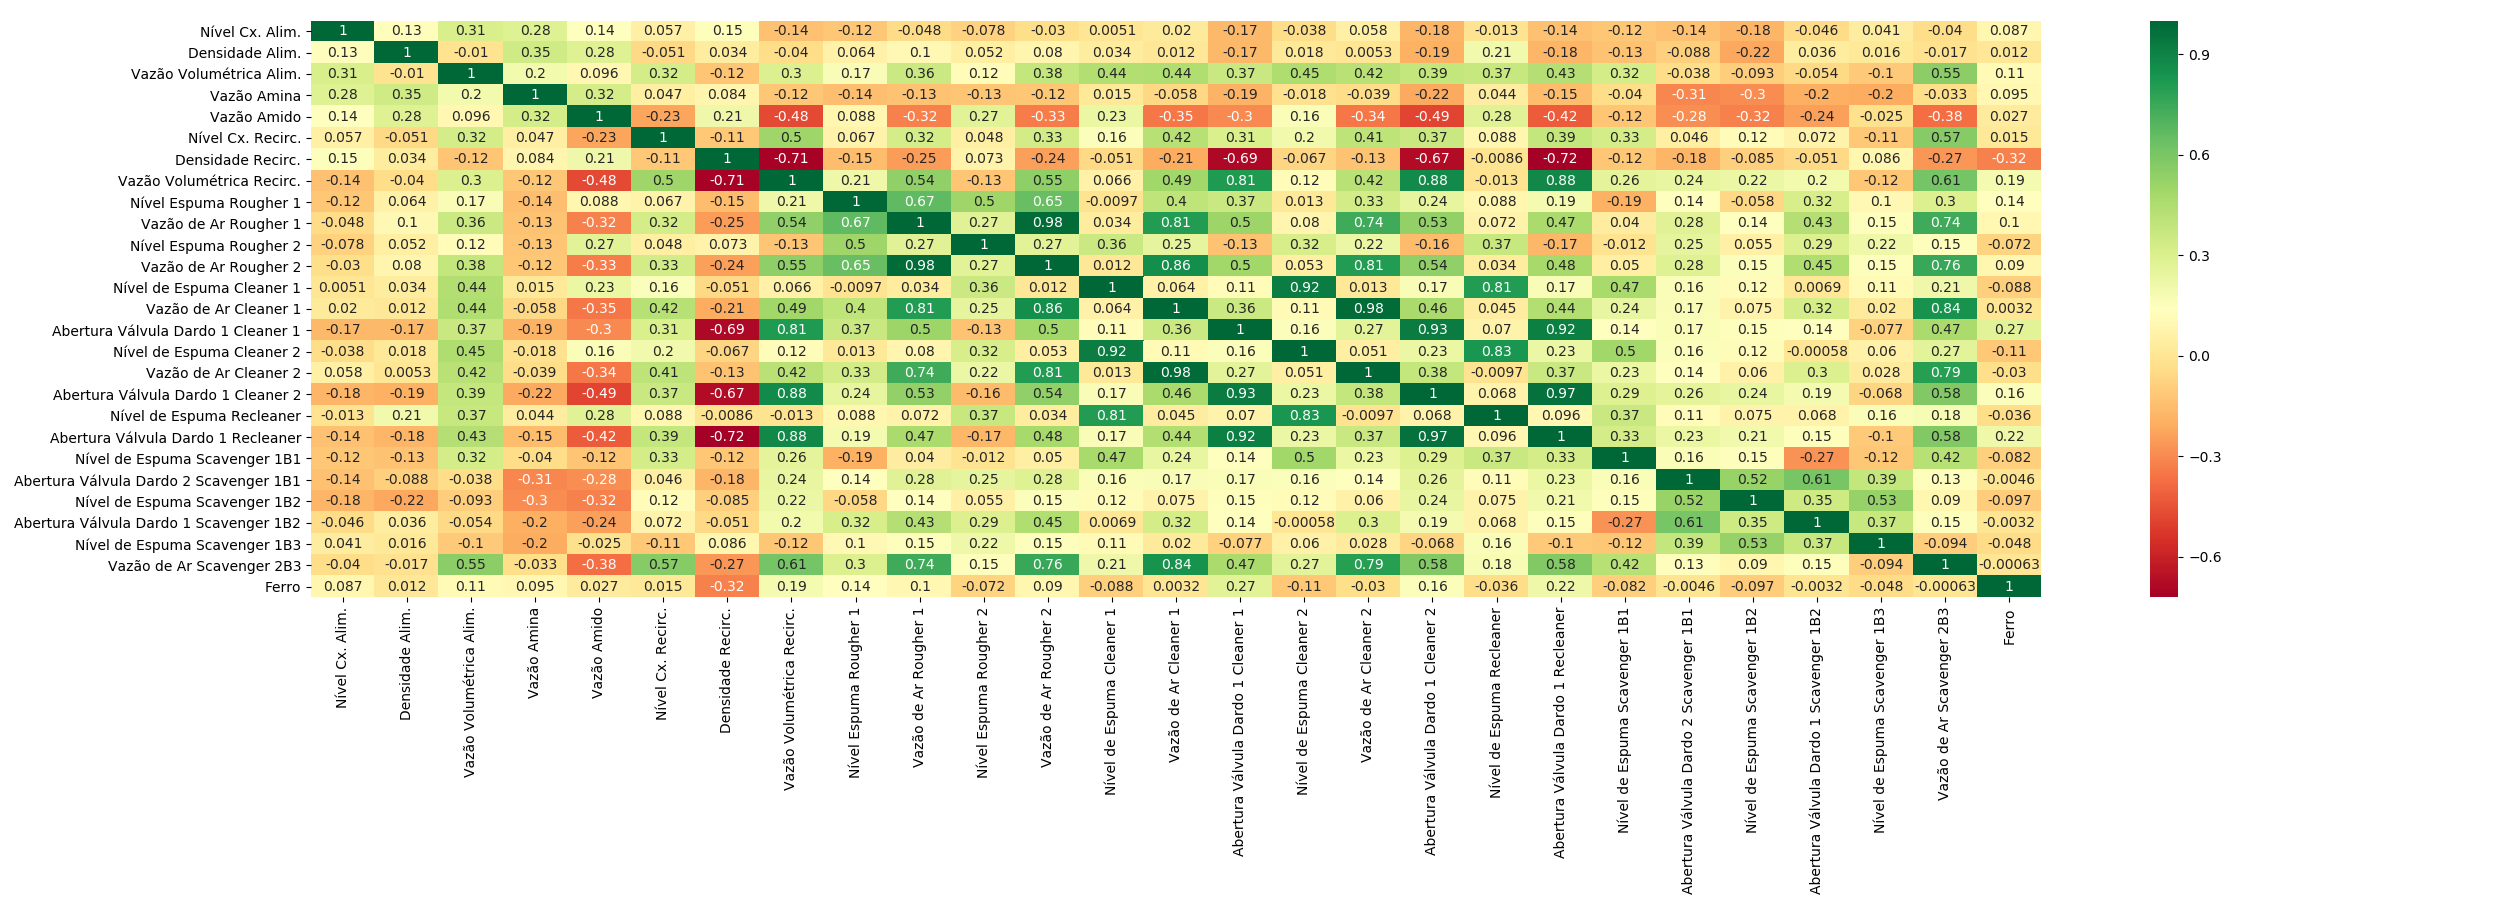

In [54]:
corrmat = dataset.corr()
top_corr_features = corrmat.index
fig, axes = plt.subplots(1, 1, figsize=(25, 9))
#plt.figure(figsize=(28,8))
plt.xlabel('xlabel', labelpad=180)
plt.ylabel('ylabel', labelpad=180)
plt.tight_layout()
g = sns.heatmap(dataset[top_corr_features].corr(), annot=True,cmap="RdYlGn")

plt.savefig('heatmap.png', dpi=None, facecolor='w', edgecolor='w',
        orientation='portrait', papertype=None, format='png',
        transparent=True, bbox_inches='tight', pad_inches=0.1,
        frameon=None, metadata=None)

#### Plot Heatmap apenas de uma linha (Ferro)

In [8]:
#corrmat = dataset.corr()
#top_corr_features = corrmat.index
#plt.figure(figsize=(25,1.5))
#g = sns.heatmap(dataset[top_corr_features].corr().iloc[-1:,:-1], annot=True,cmap="RdYlGn")

#### Plot Pairplot de apenas uma linha (Ferro)

<IPython.core.display.Javascript object>


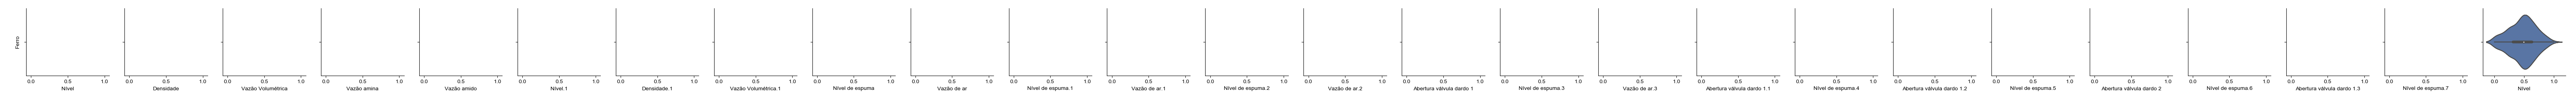

In [7]:
ax = sns.pairplot(dataset, y_vars=dataset.columns[-1], x_vars=dataset.columns[:-1], kind='reg')
#ax

#### Plot Violinplot

<IPython.core.display.Javascript object>


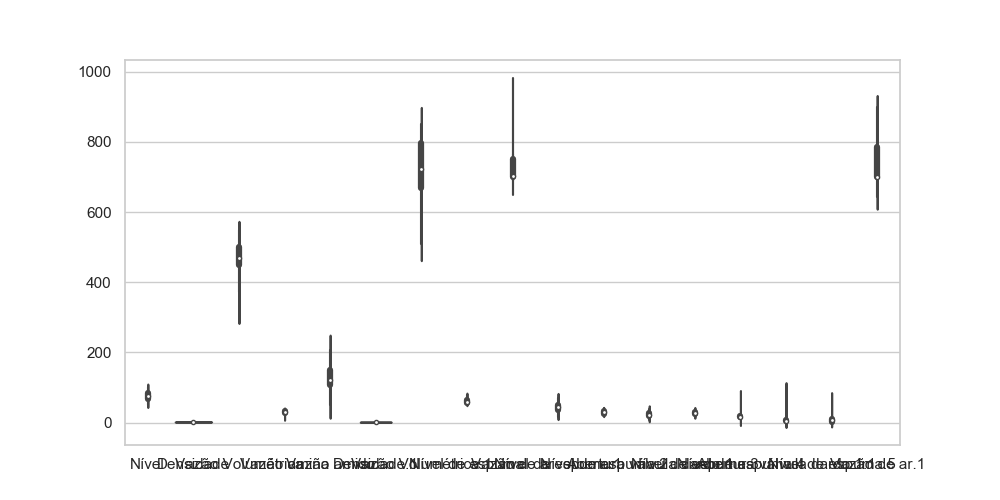

In [72]:
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.violinplot(data=dataset.iloc[:,:-1])

<IPython.core.display.Javascript object>


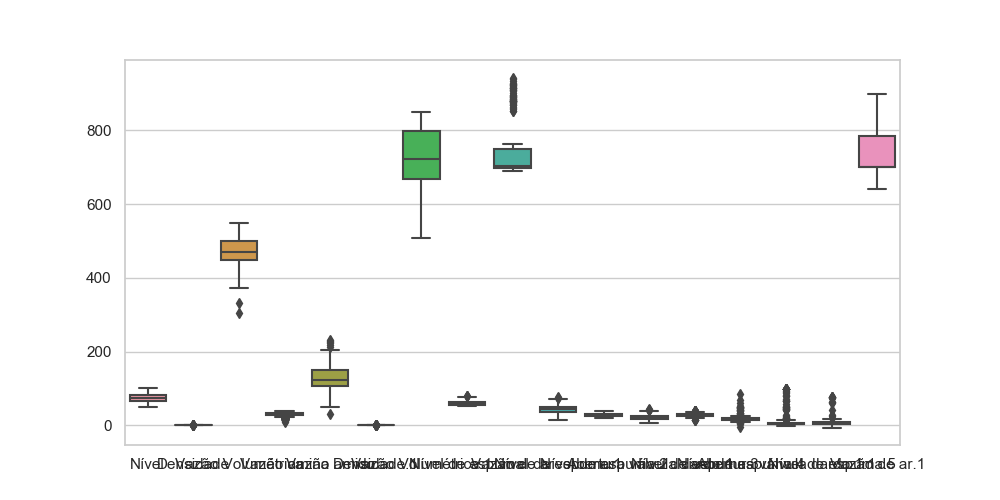

In [75]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
ax = sns.boxplot(data=dataset.iloc[:,:-1])

In [20]:
dataset.columns[1:3]

Index(['Densidade', 'Vazão Volumétrica'], dtype='object')

In [28]:
dataset[['Nível', 'Densidade']]

,Nível,Densidade
0,0.714692,0.764672
1,0.575944,0.771605
2,0.526013,0.784400
3,0.511673,0.788395
4,0.378186,0.785011
...,...,...
354,0.704455,0.742960
355,0.732676,0.731202
356,0.693711,0.738535
357,0.675728,0.751804


In [44]:
dataset.iloc[1:5,1:3]

,Densidade,Vazão Volumétrica
1,0.771605,0.972086
2,0.784400,0.900326
3,0.788395,0.872730
4,0.785011,0.778556


## Conclusion

In [116]:
normed_dataset.to_excel(pasta + '05-mediana_red_final_norm.xlsx', 'Planilha1', index=False)